In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("../data/train.csv", index_col=0)

In [17]:
df.head()

,Sequence
Id,
222447,"10,11,12,13,14,15,16,17,18,19,1011,21,1112,111..."
126500,"1,0,2,0,0,6,0,0,0,21,0,0,0,3,79,0,0,0,0,41,311..."
217366,"1,2,4,8,15,30,58,114,225,443,871,1715,3375,664..."
4216,"1,2,12,432,31104,6718464,8707129344,2256887925..."
65934,"1,2,0,3,0,0,1,4,1,0,2,0,0,2,0,5,0,2,0,0,0,4,2,..."


In [18]:
df.shape

(79692, 1)

In [60]:
df.Sequence.str.count(',').head()

Id
222447     46
126500     74
217366     28
4216       11
65934     104
Name: Sequence, dtype: int64

In [20]:
df['numbers'] = df.Sequence.str.split(',').map(np.float128)

In [21]:
df['terms'] = df.Sequence.str.count(',') + 1

In [22]:
df.head()

,Sequence,numbers,terms
Id,,,
222447,"10,11,12,13,14,15,16,17,18,19,1011,21,1112,111...","[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17....",47
126500,"1,0,2,0,0,6,0,0,0,21,0,0,0,3,79,0,0,0,0,41,311...","[1.0, 0.0, 2.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, ...",75
217366,"1,2,4,8,15,30,58,114,225,443,871,1715,3375,664...","[1.0, 2.0, 4.0, 8.0, 15.0, 30.0, 58.0, 114.0, ...",29
4216,"1,2,12,432,31104,6718464,8707129344,2256887925...","[1.0, 2.0, 12.0, 432.0, 31104.0, 6718464.0, 87...",12
65934,"1,2,0,3,0,0,1,4,1,0,2,0,0,2,0,5,0,2,0,0,0,4,2,...","[1.0, 2.0, 0.0, 3.0, 0.0, 0.0, 1.0, 4.0, 1.0, ...",105


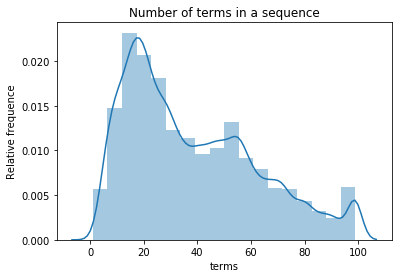

In [59]:
# larger number of bins results in weird "gaps"
sns.distplot(df.terms[df.terms < df.terms.quantile(.95)], bins=18)
plt.title("Number of terms in a sequence")
plt.ylabel("Relative frequence");